데이터 전처리 과정
==================



> 함수정리  
- detect_outliers : 이상치 확인 함수
- combine_dong : 1동과 2동을 합쳐서 새로운 동을 만드는 함수를 정의
- keep_original : 1동과 2동이 아닌 동들은 그대로 
- combine_sales : 합쳐진 동들의 매출 금액을 합치는 함수를 정의

> 데이터프레임 
- (((((df-> 추정매출))))) : 데이터프레임화
> 데이터프레임 추가정리  
- data : 데이터프레임화 , 또 안불러오시고 raw 사용 
- data_quarter : 0분기 데이터만 추출
- cleaned_data : 이상치 제거
> 변수정리
- ~path : csv 파일 불러오기
- missing : 결측치 확인
- columns_check : 이상치를 확인할 컬럼 리스트화
- column_plot : 시각화할 부분 컬럼
- combine_dongs : 합칠 동들 리스트

> 변수 추가 정리 
- threshold : 이상치 배수설정 
- columns_to_plot : 당월/주중/주말 컬럼 리스트화 
- data_to_plot : 당월/주중/주말 컬럼 만 선택한 데이터 
- 합쳐진 동에 대해 그룹화하고 매출 금액을 합침
- column_clean : 이상치를 제거할 열 
- (( Q1-> q1)) : 그냥 다른 사람이랑 맞췄습니다 
- (( Q3-> q3)) : 그냥 다른 사람이랑 맞췄습니다 
- ((lower_bound-> low)) : 그냥 다른 사람이랑 맞췄습니다 
- (( upper_bound -> high)) : 그냥 다른 사람이랑 맞췄습니다 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
path = '../csv/new추정매출-행정동.csv'
추정매출_raw = pd.read_csv(path, encoding = 'cp949')
pd.options.display.float_format = '{:}'.format
추정매출_raw.head()
추정매출 = 추정매출_raw.copy()

FileNotFoundError: [Errno 2] No such file or directory: '../csv/new추정매출-행정동.csv'

데이터프레임 결측치 확인
======================

In [47]:
# 데이터프레임의 결측치를 확인
missing = 추정매출.isnull().sum()
print('결측치 확인')
print(missing)

결측치 확인
기준_년분기_코드          0
행정동_코드             0
행정동_코드_명           0
서비스_업종_코드          0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
주중_매출_건수           0
주말_매출_건수           0
월요일_매출_건수          0
화요일_매출_건수          0
수요일_매출_건수          0
목요일_매출_건수          0
금요일_매출_건수          0
토요일_매출_건수          0
일요일_매출_건수          0
시간대_건수~06_매출_건수    0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
시간대_건수~24_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10

이상치 확인
==========

In [48]:
# 이상치를 확인할 열 선택
columns_check = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '남성_매출_금액', '여성_매출_금액']

# 이상치 확인을 위한 기준 설정 (표준편차의 몇 배수를 이상치로 간주할지)
threshold = 3

# 이상치 확인 함수
def detect_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

# 모든 열별로 이상치 확인
for col in columns_check:
    outliers = detect_outliers(추정매출, col)
    if not outliers.empty:
        print(f"{col} 열의 이상치:")
        print(outliers)
    else:
        print(f"{col} 열에 이상치가 없습니다.")

당월_매출_금액 열의 이상치:
     기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
10       20231  11680521     논현1동  CS100001       한식음식점  4.144291e+10   
20       20231  11680531     논현2동  CS100001       한식음식점  5.354989e+10   
50       20231  11680580     삼성1동  CS100001       한식음식점  4.953170e+10   
89       20231  11680630     대치4동  CS100001       한식음식점  4.206953e+10   
99       20231  11680640     역삼1동  CS100001       한식음식점  1.178180e+11   
208      20232  11680531     논현2동  CS100001       한식음식점  5.170276e+10   
238      20232  11680580     삼성1동  CS100001       한식음식점  4.990766e+10   
277      20232  11680630     대치4동  CS100001       한식음식점  4.179680e+10   
287      20232  11680640     역삼1동  CS100001       한식음식점  1.108140e+11   
397      20233  11680531     논현2동  CS100001       한식음식점  5.045811e+10   
427      20233  11680580     삼성1동  CS100001       한식음식점  4.495033e+10   
466      20233  11680630     대치4동  CS100001       한식음식점  4.061227e+10   
476      20233  11680640     역삼1동 

In [49]:
column_check = '당월_매출_금액'

for dong_code in 추정매출['행정동_코드'].unique():
    # 해당 동의 데이터를 선택
    dong_data = 추정매출[추정매출['행정동_코드'] == dong_code]
    
    # 해당 동의 이상치 확인
    outliers = detect_outliers(dong_data, column_check)
    
    if not outliers.empty:
        print(f"{dong_code} 동의 {column_check} 열의 이상치:")
        print(outliers)
        # 이상치에 대한 처리를 여기에 추가할 수 있습니다.
    else:
        print(f"{dong_code} 동의 {column_check} 열에 이상치가 없습니다.") 

11680510 동의 당월_매출_금액 열에 이상치가 없습니다.
11680521 동의 당월_매출_금액 열의 이상치:
    기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
10      20231  11680521     논현1동  CS100001       한식음식점  4.144291e+10   

    당월_매출_건수      주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  시간대_건수~21_매출_건수  \
10    869043  3.307825e+10  8.364653e+09  5546197979  ...           224287   

    시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  연령대_10_매출_건수  연령대_20_매출_건수  \
10           133017    442494    272563          1974        138863   

    연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  
10        237427        155299        113152            68323  

[1 rows x 53 columns]
11680531 동의 당월_매출_금액 열의 이상치:
    기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
20      20231  11680531     논현2동  CS100001       한식음식점  5.354989e+10   

    당월_매출_건수      주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  시간대_건수~21_매출_건수  \
20   1147642  4.508235e+10  8.467532e+09  7986548484  ...           276054   

    시간대_건

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3

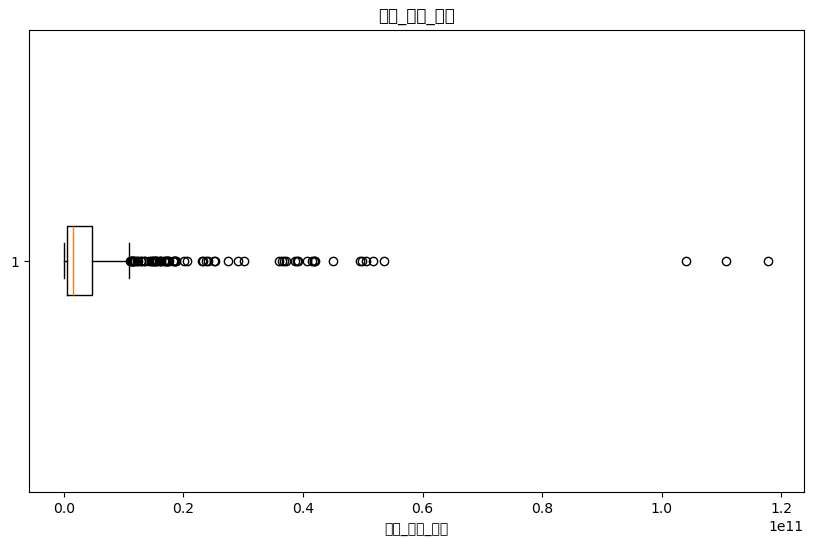

In [50]:
# 그림 그릴 열 선택
column_plot = '당월_매출_금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(추정매출[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE

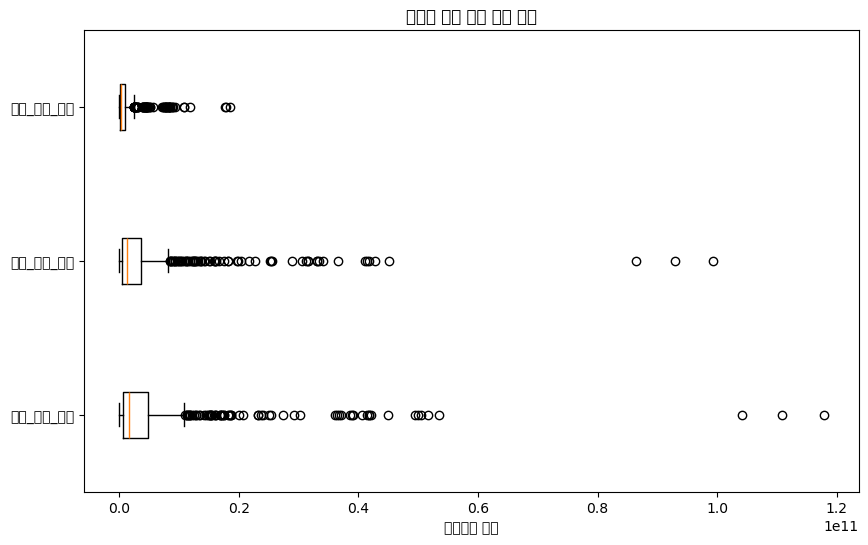

In [51]:

# 그림 그릴 열 선택
columns_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액'] 

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = 추정매출[columns_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('다양한 열에 대한 상자 그림')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_plot) + 1), columns_plot)  # y축 눈금 라벨 설정
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE

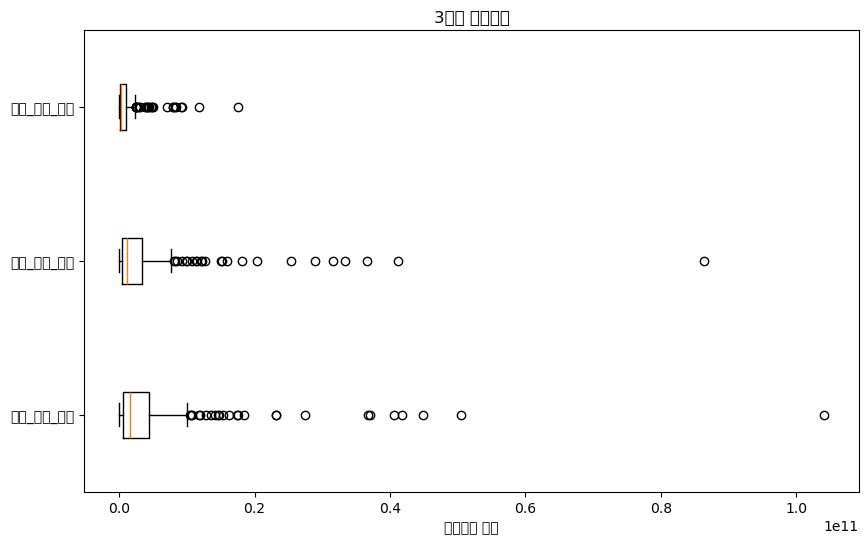

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

추정매출 = 추정매출_raw.copy()
# 0분기 데이터만 추출
data_quarter = 추정매출[추정매출['기준_년분기_코드'] == 20233]

# 그림 그릴 열 선택
columns_to_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = data_quarter[columns_to_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('3분기 추정매출')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)  # y축 눈금 라벨 설정
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


추정매출 = 추정매출_raw.copy()

추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'삼성1동': '삼성동', '삼성2동': '삼성동'})
추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'논현1동': '논현동', '논현2동': '논현동'})
추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'개포1동': '개포동', '개포2동': '개포동', '개포4동': '개포동'})
추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'대치1동': '대치동', '대치2동': '대치동', '대치4동': '대치동'})
추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'도곡1동': '도곡동', '도곡2동': '도곡동'})
추정매출['행정동_코드_명'] = 추정매출['행정동_코드_명'].replace({'역삼1동': '역삼동', '역삼2동': '역삼동'})

추정매출['합친_동_매출'] = 추정매출.loc[(추정매출['행정동_코드_명'] == '삼성1동') | (추정매출['행정동_코드_명'] == '삼성2동'), 
                           ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum(axis=1)
print(추정매출.head(10))


   기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  당월_매출_건수  \
0      20231  11680510      신사동  CS100001       한식음식점  3.018156e+10    614725   
1      20231  11680510      신사동  CS100002       중식음식점  2.593729e+09     72753   
2      20231  11680510      신사동  CS100003       일식음식점  1.555187e+10    254265   
3      20231  11680510      신사동  CS100004       양식음식점  1.247546e+10    266176   
4      20231  11680510      신사동  CS100005         제과점  1.976156e+09    129017   
5      20231  11680510      신사동  CS100006      패스트푸드점  1.462896e+09     67206   
6      20231  11680510      신사동  CS100007       치킨전문점  5.630757e+08     11557   
7      20231  11680510      신사동  CS100008       분식전문점  3.883373e+09    224950   
8      20231  11680510      신사동  CS100009     호프-간이주점  6.349757e+09    101730   
9      20231  11680510      신사동  CS100010       커피-음료  7.535265e+09    617733   

       주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  시간대_건수~24_매출_건수  남성_매출_건수  \
0  2.278670e+10  7.394854e+09  

1동 2동 하나로 묶기
==================

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


추정매출 = 추정매출_raw.copy()

# 1동과 2동이 있는 동들의 리스트
combine_dongs = ['삼성','논현', '개포', '대치', '도곡', '역삼']

# 1동과 2동을 합쳐서 새로운 동을 만드는 함수를 정의
def combine_dong(dong):
    for d in combine_dongs:
        if d in dong:
            return d
    return dong

# 1동과 2동이 아닌 동들은 그대로 
def keep_original(dong):
    for d in combine_dongs:
        if d in dong:
            return None
    return dong

# 합쳐진 동들의 매출 금액을 합치는 함수를 정의
def combine_sales(group):
    return group[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()

# 새로운 열에 새로운 동을 할당
추정매출['합쳐진_동'] = 추정매출['행정동_코드_명'].apply(combine_dong)

# 합쳐진 동에 대해 그룹화하고 매출 금액을 합침
combined_sales = 추정매출.groupby('합쳐진_동').apply(combine_sales)

# 새로운 열에 원래 동을 할당
추정매출['원래_동'] = 추정매출['행정동_코드_명'].apply(keep_original)



# 변경된 데이터를 확인
print(추정매출.head(10))


   기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  당월_매출_건수  \
0      20231  11680510      신사동  CS100001       한식음식점  3.018156e+10    614725   
1      20231  11680510      신사동  CS100002       중식음식점  2.593729e+09     72753   
2      20231  11680510      신사동  CS100003       일식음식점  1.555187e+10    254265   
3      20231  11680510      신사동  CS100004       양식음식점  1.247546e+10    266176   
4      20231  11680510      신사동  CS100005         제과점  1.976156e+09    129017   
5      20231  11680510      신사동  CS100006      패스트푸드점  1.462896e+09     67206   
6      20231  11680510      신사동  CS100007       치킨전문점  5.630757e+08     11557   
7      20231  11680510      신사동  CS100008       분식전문점  3.883373e+09    224950   
8      20231  11680510      신사동  CS100009     호프-간이주점  6.349757e+09    101730   
9      20231  11680510      신사동  CS100010       커피-음료  7.535265e+09    617733   

       주중_매출_금액      주말_매출_금액   월요일_매출_금액  ...  남성_매출_건수  여성_매출_건수  \
0  2.278670e+10  7.394854e+09  3752980

In [55]:
추정매출.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        566 non-null    int64  
 1   행정동_코드           566 non-null    int64  
 2   행정동_코드_명         566 non-null    object 
 3   서비스_업종_코드        566 non-null    object 
 4   서비스_업종_코드_명      566 non-null    object 
 5   당월_매출_금액         566 non-null    float64
 6   당월_매출_건수         566 non-null    int64  
 7   주중_매출_금액         566 non-null    float64
 8   주말_매출_금액         566 non-null    float64
 9   월요일_매출_금액        566 non-null    int64  
 10  화요일_매출_금액        566 non-null    float64
 11  수요일_매출_금액        566 non-null    int64  
 12  목요일_매출_금액        566 non-null    int64  
 13  금요일_매출_금액        566 non-null    int64  
 14  토요일_매출_금액        566 non-null    float64
 15  일요일_매출_금액        566 non-null    float64
 16  시간대_00~06_매출_금액  566 non-null    int64  
 17  시간대_06~11_매출_금액 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

추정매출 = 추정매출_raw.copy()


# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    # 동 이름에서 숫자 부분을 제외한 문자열을 반환
    return ''.join(filter(str.isalpha, dong))

# 동별 음식점 종류를 고려하여 매출을 합치는 함수를 정의
def combine_sales_by_category(group):
    # 각 동의 음식점 종류를 그룹화하고 매출을 합침
    combined_sales = group.groupby('서비스_업종_코드_명')[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()
    return combined_sales

# 동 이름에서 숫자 부분을 제외하고 그룹화
추정매출['합쳐진_동'] = 추정매출['행정동_코드_명'].apply(combine_dong)

# 각 동별 음식점 종류를 고려하여 매출을 합침
combined_sales_by_category = 추정매출.groupby(['합쳐진_동', '서비스_업종_코드_명']).apply(combine_sales_by_category)

# 변경된 데이터를 확인
print(combined_sales_by_category)

# 새로운 CSV 파일로 저장
combined_sales_by_category.to_csv('합쳐진_동_음식점_종류별_매출.csv', encoding='utf-8-sig')


                                   당월_매출_금액      주중_매출_금액      주말_매출_금액
합쳐진_동 서비스_업종_코드_명 서비스_업종_코드_명                                          
개포동   분식전문점       분식전문점        8.027283e+09  5.744430e+09  2.282853e+09
      양식음식점       양식음식점        9.548022e+07  8.132304e+07  1.415717e+07
      일식음식점       일식음식점        1.524687e+09  1.162763e+09  3.619240e+08
      제과점         제과점          1.290112e+09  9.568252e+08  3.332869e+08
      중식음식점       중식음식점        2.967676e+09  2.006321e+09  9.613555e+08
...                                     ...           ...           ...
청담동   치킨전문점       치킨전문점        1.697115e+09  1.325555e+09  3.715600e+08
      커피-음료       커피-음료        1.209461e+10  9.446346e+09  2.648260e+09
      패스트푸드점      패스트푸드점       1.301541e+09  9.184923e+08  3.830484e+08
      한식음식점       한식음식점        7.357269e+10  5.774357e+10  1.582911e+10
      호프-간이주점     호프-간이주점      1.024811e+10  7.533274e+09  2.714841e+09

[120 rows x 3 columns]


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


추정매출 = 추정매출_raw.copy()
# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    # 동 이름에서 숫자 부분을 제외한 문자열을 반환합니다.
    return ''.join(filter(str.isalpha, dong))

# 동별 음식점 종류를 고려하여 매출을 합치는 함수를 정의합니다.
def combine_sales_by_category(group):
    # 각 동의 음식점 종류를 그룹화하고 매출을 합칩니다.
    combined_sales = group.groupby(['서비스_업종_코드_명', '기준_년분기_코드'])[['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']].sum()
    return combined_sales

# 동 이름에서 숫자 부분을 제외하고 그룹화합니다.
추정매출['합쳐진_동'] = 추정매출['행정동_코드_명'].apply(combine_dong)

# 각 동별 음식점 종류를 고려하여 매출을 합칩니다.
combined_sales_by_category = 추정매출.groupby(['합쳐진_동', '서비스_업종_코드_명']).apply(combine_sales_by_category)

# 변경된 데이터를 확인합니다.
print(combined_sales_by_category)





                                             당월_매출_금액      주중_매출_금액  \
합쳐진_동 서비스_업종_코드_명 서비스_업종_코드_명 기준_년분기_코드                               
개포동   분식전문점       분식전문점       20231      2.963907e+09  2.312159e+09   
                              20232      2.718341e+09  1.866699e+09   
                              20233      2.345035e+09  1.565573e+09   
      양식음식점       양식음식점       20231      1.417315e+07  1.263077e+07   
                              20232      1.508865e+07  1.350592e+07   
...                                               ...           ...   
청담동   한식음식점       한식음식점       20232      2.531663e+10  1.970005e+10   
                              20233      2.319967e+10  1.815219e+10   
      호프-간이주점     호프-간이주점     20231      3.307094e+09  2.387661e+09   
                              20232      3.282805e+09  2.425767e+09   
                              20233      3.658216e+09  2.719846e+09   

                                             주말_매출_금액  
합쳐진_동 서비스_업종_코드_명 서비

In [40]:
# 새로운 CSV 파일로 저장합니다.
combined_sales_by_category.to_csv('합쳐진_동_음식점_종류별_매출.csv', encoding='utf-8-sig')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE

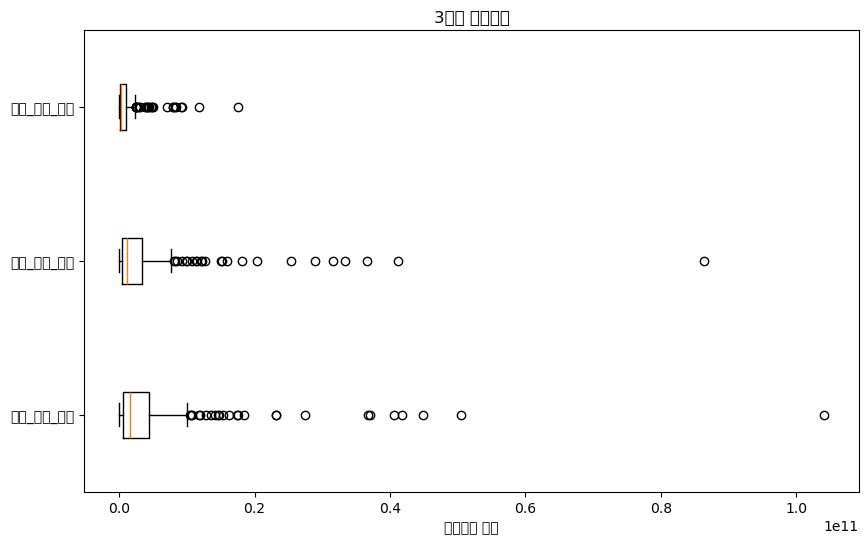

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

추정매출 = 추정매출_raw.copy()

# 0분기 데이터만 추출
data_quarter = 추정매출[추정매출['기준_년분기_코드'] == 20233]

# 그림 그릴 열 선택
columns_to_plot = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액']

# 상자 그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

data_to_plot = data_quarter[columns_to_plot]
plt.boxplot(data_to_plot, vert=False)
plt.title('3분기 추정매출')
plt.xlabel('추정매출 금액')
plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)  # y축 눈금 라벨 설정
plt.show()

In [58]:
추정매출 = 추정매출_raw.copy()

# 이상치를 제거할 열 선택
column_clean = '당월_매출_금액'

# IQR 계산
q1 = 추정매출[column_clean].quantile(0.25)
q3 = 추정매출[column_clean].quantile(0.75)
IQR = q3 - q1

# 이상치 경계 설정
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# 이상치 제거
cleaned_data = 추정매출[(추정매출[column_clean] >= lower_bound) & (추정매출[column_clean] <= upper_bound)]

# 이상치 제거한 데이터 출력
print(cleaned_data)

     기준_년분기_코드    행정동_코드 행정동_코드_명 서비스_업종_코드 서비스_업종_코드_명      당월_매출_금액  \
1        20231  11680510      신사동  CS100002       중식음식점  2.593729e+09   
4        20231  11680510      신사동  CS100005         제과점  1.976156e+09   
5        20231  11680510      신사동  CS100006      패스트푸드점  1.462896e+09   
6        20231  11680510      신사동  CS100007       치킨전문점  5.630757e+08   
7        20231  11680510      신사동  CS100008       분식전문점  3.883373e+09   
..         ...       ...      ...       ...         ...           ...   
561      20233  11680750      수서동  CS100006      패스트푸드점  1.329093e+09   
562      20233  11680750      수서동  CS100007       치킨전문점  2.816696e+08   
563      20233  11680750      수서동  CS100008       분식전문점  5.504367e+08   
564      20233  11680750      수서동  CS100009     호프-간이주점  3.376301e+08   
565      20233  11680750      수서동  CS100010       커피-음료  3.010180e+09   

     당월_매출_건수      주중_매출_금액     주말_매출_금액  월요일_매출_금액  ...  시간대_건수~21_매출_건수  \
1       72753  2.060225e+09  533504813.0  3168

다시 이상치 처리
==============

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/s

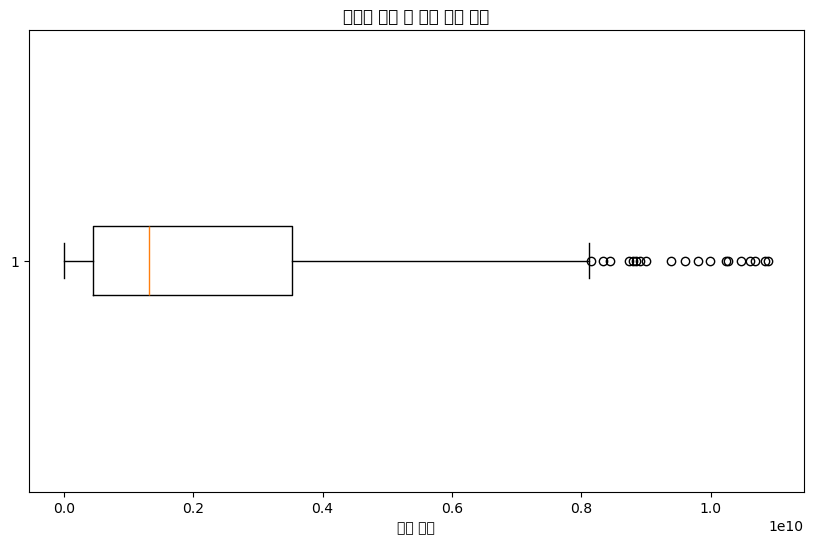

In [59]:
# 이상치를 제거한 후의 데이터를 사용한다고 가정합니다.
cleaned_data = 추정매출[(추정매출[column_clean] >= lower_bound) & (추정매출[column_clean] <= upper_bound)]

# 상자그림을 그릴 열 선택
column_plot = '당월_매출_금액'

# 상자그림 생성
plt.figure(figsize=(10, 6), dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(cleaned_data[column_plot], vert=False)
plt.title('이상치 제거 후 당월 매출 금액')
plt.xlabel('매출 금액')
plt.show()